read,show the image and save it

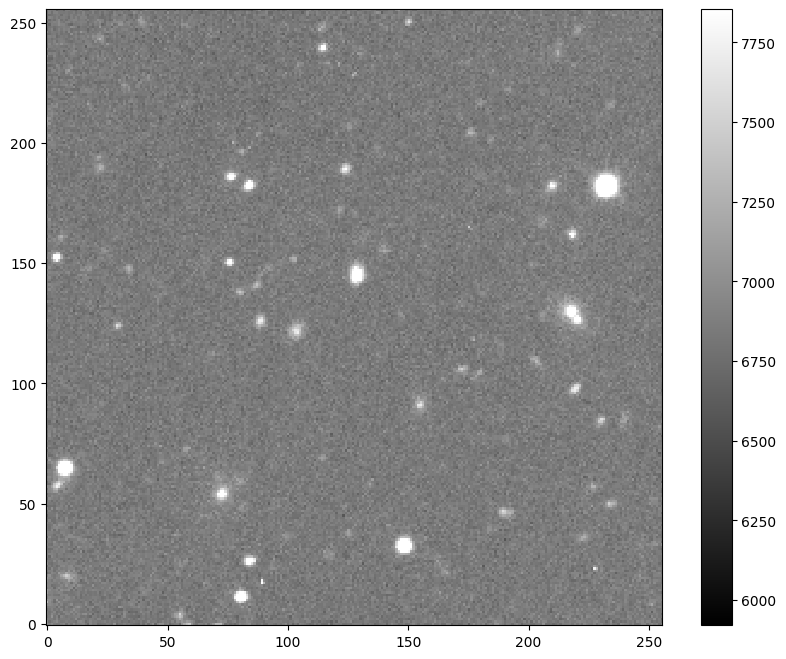

In [9]:
import numpy as np
import sep
from astropy.io import fits 
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Ellipse
#maybe need to run 2 times if see the warning at here
rcParams['figure.figsize']=[10.,8.]

with fits.open('image.fits') as hdul:
    data=hdul[0].data
m,s=np.mean(data),np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.savefig('original_image.png')


background subtraction

6852.04931640625
65.46174621582031


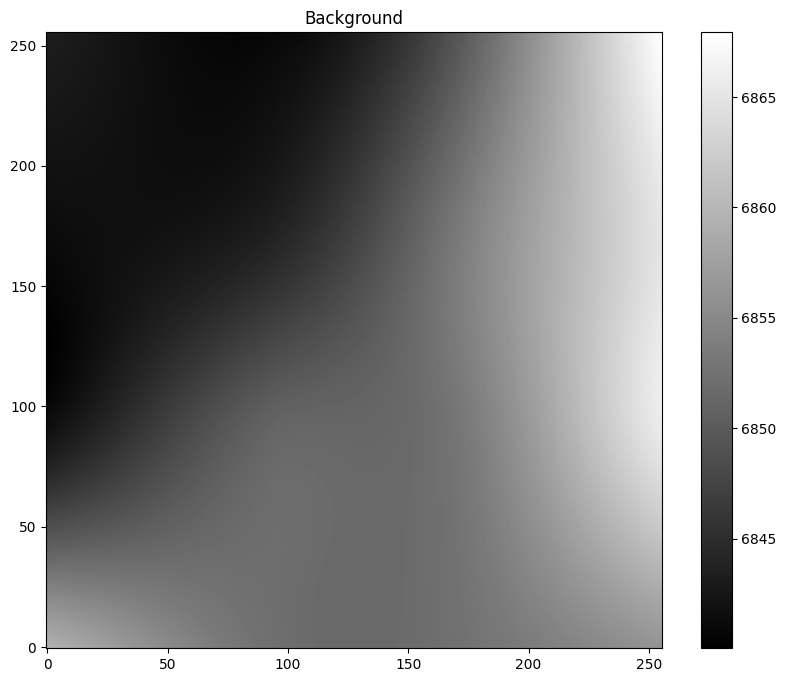

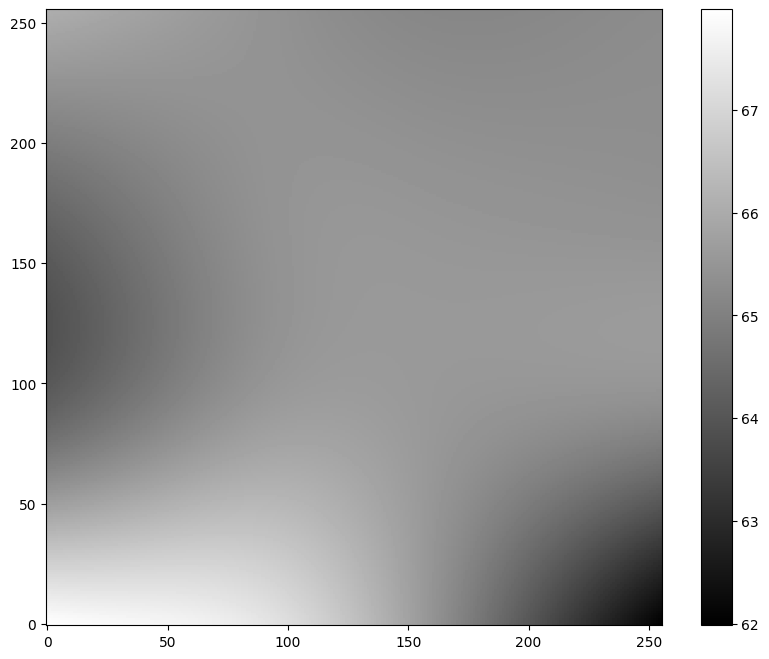

In [10]:
bkg = sep.Background(data)
print(bkg.globalback)  
print(bkg.globalrms)

bkg_image = bkg.back()
bkg_rms = bkg.rms()

plt.figure()
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title('Background')
plt.savefig('background.png')
plt.show()

bkg_rms=bkg.rms()
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
data_sub=data-bkg
plt.savefig('background_rms.png')

object detection

69


('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

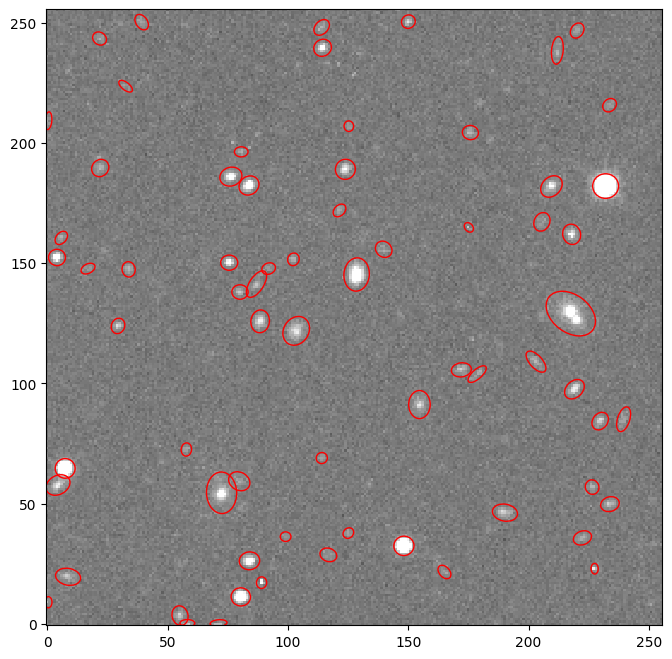

In [11]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)
len(objects)
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects[i]['x'], objects[i]['y']),
                width=6*objects[i]['a'],
                height=6*objects[i]['b'],
                angle=objects[i]['theta'] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig('detected_objects.png')
print(len(objects))
objects.dtype.names

In [12]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.157852 +/- 291.027799
object 1: flux = 3092.217500 +/- 291.592199
object 2: flux = 5949.861113 +/- 356.561993
object 3: flux = 1851.419824 +/- 295.028805
object 4: flux = 72736.380312 +/- 440.172199
object 5: flux = 3860.756895 +/- 352.163163
object 6: flux = 6418.902715 +/- 357.458957
object 7: flux = 2210.714238 +/- 350.791233
object 8: flux = 2741.609297 +/- 352.277749
object 9: flux = 20916.877363 +/- 376.966141
